# Binary Stat Data Analysing 

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring the Data
Show an overview of our data:

In [2]:
data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
data.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [5]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


## Data Visualizing

Text(0.5, 0, 'GPA')

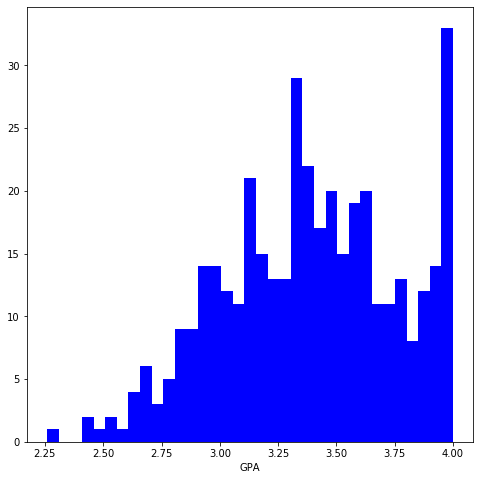

In [6]:
plt.figure(figsize=(8,8))
plt.hist(data['gpa'],bins=35,color='blue')
plt.xlabel('GPA')

Text(0.5, 0, 'GPA')

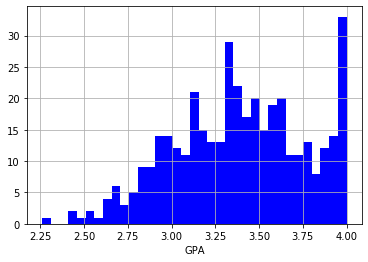

In [7]:
data['gpa'].hist(bins=35,color='blue')
plt.xlabel('GPA')

Text(0.5, 0, 'GRE Score')

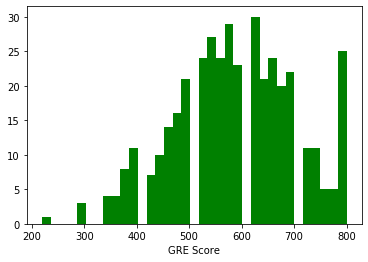

In [8]:
plt.hist(data['gre'],bins=35,color='Green')
plt.xlabel('GRE Score')

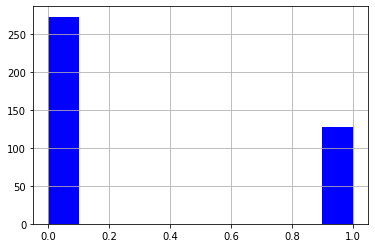

In [9]:
data['admit'].hist(color='blue')

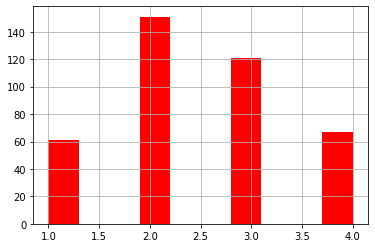

In [10]:
data['rank'].hist(color='red')

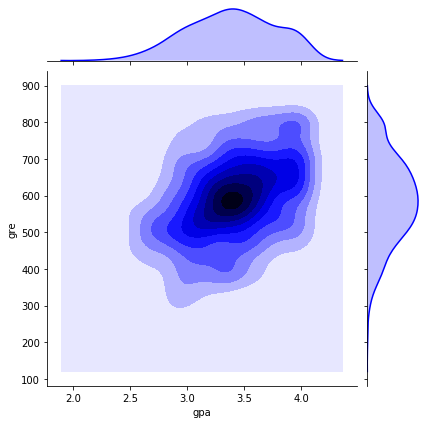

In [11]:
sns.jointplot(x='gpa',y='gre',data=data,color='blue',kind='kde')

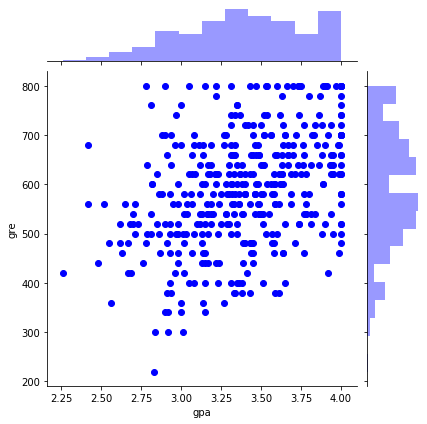

In [12]:
sns.jointplot(x='gpa',y='gre',data=data,color='blue')

## Data Cleaning

In [13]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [14]:
#1,2,3,4 = 0,1 rank1,rank2, rank3, rank4
dummy_ranks = pd.get_dummies(data['rank'],prefix='rank')

In [15]:
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [16]:
data.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [17]:
dummy_ranks.tail()

,rank_1,rank_2,rank_3,rank_4
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0
399,0,0,1,0


In [18]:
cols_we_need = ['admit','gre','gpa']

In [19]:
data = data[cols_we_need].join(dummy_ranks.ix[:,'rank_2':])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [20]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


## Train the DataSet

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data[['gre','gpa','rank_2','rank_3','rank_4']]
y = data['admit']

In [23]:
# Splitting training and testing data taken from the Original Training Data.
# This is done in order control the overfitting of model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [24]:
print(X_train.shape)
print(y_train.shape)

(280, 5)
(280,)


In [25]:
print(X_test.shape)
print(y_test.shape)

(120, 5)
(120,)


#### Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
model.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
prediction = model.predict(X_test)

#### Classification Report

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        88
           1       0.50      0.28      0.36        32

    accuracy                           0.73       120
   macro avg       0.64      0.59      0.60       120
weighted avg       0.70      0.73      0.71       120



## Comparing with another Model of same dataset

In [33]:
X = data[['gre','gpa',]]
y = data['admit']

In [34]:
# Splitting training and testing data taken from the Original Training Data.
# This is done in order control the overfitting of model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [35]:
print(X_train.shape)
print(y_train.shape)

(280, 2)
(280,)


In [36]:
print(X_test.shape)
print(y_test.shape)

(120, 2)
(120,)


#### Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model2 = LogisticRegression()

In [39]:
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
prediction2 = model.predict(X_test)

#### Classification Report

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        88
           1       0.00      0.00      0.00        32

    accuracy                           0.73       120
   macro avg       0.37      0.50      0.42       120
weighted avg       0.54      0.73      0.62       120



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
